In [1]:
import string
import sklearn
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import xgboost as xgb

In [2]:
data = pd.read_csv('data/tweets_labelled_tokenized.csv', sep=',', encoding='utf-8')
data.head()

,tweet,polaritas,sentimen
0,"['jbharga', 'ayam', 'rm', 'tgk', 'telor', 'wya...",-2,Negatif
1,"['diri', 'di', 'atas', 'kaki', 'sendiri', 'ser...",-2,Negatif
2,"['sebab', 'harga', 'telur', 'anjlok', 'versi',...",5,Positif
3,"['turun', 'minta', 'masyarakat', 'telur', 'aya...",-1,Negatif
4,"['ternak', 'ayam', 'telur', 'aku', 'rugi', 'ra...",5,Positif


In [3]:
data = data.astype({'sentimen' : 'category'})
data = data.astype({'tweet' : 'string'})
data.dtypes

tweet          string
polaritas       int64
sentimen     category
dtype: object

In [4]:
#PROSES TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data['tweet'].astype('U'))
text_tf

<2879x5910 sparse matrix of type '<class 'numpy.float64'>'
	with 34731 stored elements in Compressed Sparse Row format>

In [5]:
print(text_tf)

  (0, 1707)	0.25979584298337827
  (0, 1119)	0.41295004942863756
  (0, 3884)	0.27612999197438504
  (0, 5841)	0.41295004942863756
  (0, 5316)	0.1330222058963743
  (0, 5441)	0.35041334541457875
  (0, 4525)	0.4404523848214634
  (0, 294)	0.10095738868626981
  (0, 2162)	0.41295004942863756
  (1, 1804)	0.062389089641635045
  (1, 5069)	0.2835884350969081
  (1, 5410)	0.13877219318947345
  (1, 5326)	0.07546306533573656
  (1, 4864)	0.27166679753677436
  (1, 4828)	0.434314213946434
  (1, 2273)	0.434314213946434
  (1, 274)	0.3312979610541905
  (1, 1138)	0.434314213946434
  (1, 1231)	0.37587911347960734
  (2, 2264)	0.4821161802797001
  (2, 1030)	0.3699277142976232
  (2, 5731)	0.6243073763765257
  (2, 193)	0.21942891308221735
  (2, 4721)	0.42075705428872345
  (2, 1804)	0.0800225085951331
  :	:
  (2876, 1297)	0.23263013629577486
  (2876, 4866)	0.2795462362660438
  (2876, 5653)	0.26833591588147465
  (2876, 5119)	0.2195185734483243
  (2876, 3905)	0.19851509760473363
  (2876, 2062)	0.16413038489184745
  

In [6]:
#SPLITTING DATA
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_tf, data['sentimen'], test_size = 0.2, random_state = 42)

In [7]:
#ALGORITMA NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)

print("Multinomial Naive Bayes Acuracy:", accuracy_score(y_test, predicted)*100)
print("Multinomial Naive Bayes Precision:", precision_score(y_test, predicted, average="binary", pos_label="Negatif")*100)
print("Multinomial Naive Bayes Recall:", recall_score(y_test, predicted, average="binary", pos_label="Negatif")*100)
print("Multinomial Naive Bayes f1_score:", f1_score(y_test, predicted, average="binary", pos_label="Negatif")*100)

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

Multinomial Naive Bayes Acuracy: 80.72916666666666
Multinomial Naive Bayes Precision: 84.61538461538461
Multinomial Naive Bayes Recall: 9.166666666666666
Multinomial Naive Bayes f1_score: 16.54135338345864
confusion matrix:
 [[ 11 109]
 [  2 454]]

              precision    recall  f1-score   support

     Negatif       0.85      0.09      0.17       120
     Positif       0.81      1.00      0.89       456

    accuracy                           0.81       576
   macro avg       0.83      0.54      0.53       576
weighted avg       0.81      0.81      0.74       576



In [8]:
print("Multinomial Naive Bayes Acuracy:", accuracy_score(y_test, predicted)*100)

Multinomial Naive Bayes Acuracy: 80.72916666666666


In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Multinomial Naive Bayes Acuracy: 80.72916666666666


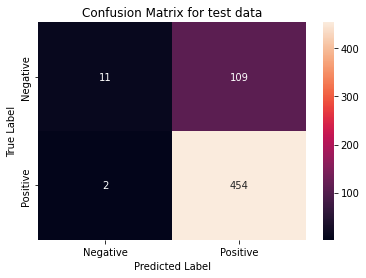

In [10]:
print("Multinomial Naive Bayes Acuracy:", accuracy_score(y_test, predicted)*100)

conf_mat = confusion_matrix(y_test, predicted)
class_label = ["Negative","Positive"]
test =pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()